Mean Squared Error: 9550764.101039082
R-squared: -0.18847888290839898
                     importance
Manufacturing costs    0.114720
Defect rates           0.096785
Stock levels           0.073339
Availability           0.063232
Costs                  0.062712


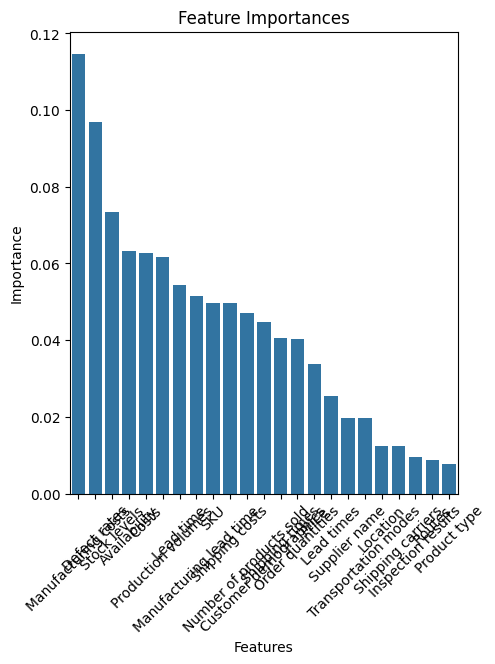

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('file_path.csv')

# Data Preprocessing
# Handle missing values by filling with mean for numerical columns
data.fillna(data.mean(numeric_only=True), inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature and target selection
X = data.drop('Revenue generated', axis=1)
Y = data['Revenue generated']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Training with Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)

# Model Evaluation
Y_pred = rf_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature Importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head())

# Plot Feature Importances
plt.figure(figsize=(5, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()
